In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [2]:
#MODEL

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [5]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8249174.751388069, tolerance: 3898.6869563806586
  positive)


In [6]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741439134, tolerance: 3898.6869563806586
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679522634, tolerance: 3898.6869563806586
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.7561374865472, tolerance: 3898.6869563806586
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5357.774935577065, tolerance: 3898.68695

Text(0, 0.5, 'weight')

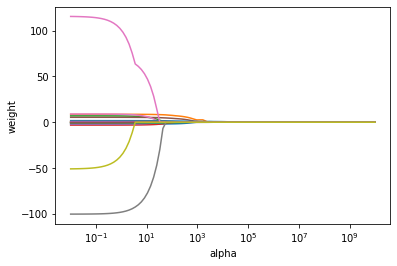

In [7]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel("alpha")
plt.ylabel("weight")

In [9]:
#TAHMİN

In [10]:
y_pred = lasso_model.predict(X_test)

In [11]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.7545270148768

In [12]:
#MODEL TUNİNG

In [14]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)
#bazen kendimize verebilirz fakat kendi ön koşullu alpha değerleri vardır

In [18]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [19]:
lasso_cv_model.alpha_

0.3940612643247005

In [20]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [21]:
lasso_tuned.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8252823.94352401, tolerance: 3898.6869563806586
  positive)


Lasso(alpha=0.3940612643247005)

In [22]:
y_tuned_pred = lasso_tuned.predict(X_test)

In [23]:
np.sqrt(mean_squared_error(y_test, y_tuned_pred))

356.5226376958367